# Exploratory Data Analysis

In [237]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [196]:
df = pd.read_csv("autotrader_prices_cleaned.csv")

In [197]:
df.head()

,BHP,ULEZ,body,engine,fuel,mileage,name,owners,price,transmission,...,se,eco,sport,m_sport,lux,sat_nav,bluetooth,leather,three_door,year_reg
0,108.0,ULEZ,Hatchback,1.6,Diesel,82850,Audi A3 1.6 TDI SE 5d 109 BHP Nav Prep - Bluet...,2.0,7991,Manual,...,1,0,0,0,0,1,1,0,0,15 reg
1,148.0,ULEZ,Hatchback,2.0,Diesel,38627,"Audi A3 2.0 TDI SE 5d 148 BHP, £20 YEAR ROAD T...",2.0,10980,Manual,...,1,0,0,0,0,1,0,0,0,65 reg
2,108.0,ULEZ,Hatchback,1.6,Diesel,84812,Audi A3 1.6 TDI 110 Sport 5dr Satellite Naviga...,2.0,8350,Manual,...,0,0,1,0,0,1,0,0,0,15 reg
3,182.0,ULEZ,Hatchback,2.0,Diesel,74413,Audi A3 2.0 TDI Sport Sportback S Tronic quatt...,2.0,9699,Automatic,...,0,0,1,0,0,0,0,0,0,15 reg
4,108.0,ULEZ,Hatchback,1.6,Diesel,59152,Audi A3 1.6 TDI SE Sportback 5dr,2.0,8990,Manual,...,1,0,1,0,0,0,0,0,0,15 reg


In [198]:
df.columns

Index(['BHP', 'ULEZ', 'body', 'engine', 'fuel', 'mileage', 'name', 'owners',
       'price', 'transmission', 'year', 'make', 'model', 'se', 'eco', 'sport',
       'm_sport', 'lux', 'sat_nav', 'bluetooth', 'leather', 'three_door',
       'year_reg'],
      dtype='object')

In [199]:
# Check make variants - Mazda3 has not been correctly split into Mazda(make) and 3(model)
df.make.value_counts()

BMW       341
Audi      183
Fiat       66
Mazda      14
Lexus      13
Mazda3      9
Name: make, dtype: int64

In [200]:
# Check model variants - some wrong itmes due to incorrect pre-processing of Mazda3
df.model.value_counts()

1              201
A3             183
3              154
500             66
CT              12
2L               5
2.0              2
2.2L             1
Cthatchback      1
2.2              1
Name: model, dtype: int64

In [201]:
# Update Mazda3 into correct make and model
index_mazda3 = df[df.make == "Mazda3"].index
df.at[index_mazda3, "model"] = "Mazda3"
df.at[index_mazda3, "make"] = "Mazda"

In [202]:
# Update model 3 into BMW 3 to differetiate from Mazda 3
index_3 = df[df.model == "3"]
index_bmw = index_3[index_3.make == "BMW"].index
index_mazda = index_3[index_3.make == "Mazda"].index
df.at[index_bmw, "model"] = "BMW3"
df.at[index_mazda, "model"] = "Mazda3"

In [203]:
# Update Cthatchback to CT
index_CT = df[df.model == "Cthatchback"].index
df.at[index_CT, "model"] = "CT"

In [204]:
df.make.value_counts()

BMW      341
Audi     183
Fiat      66
Mazda     23
Lexus     13
Name: make, dtype: int64

In [205]:
df.model.value_counts()

1         201
A3        183
BMW3      140
500        66
Mazda3     23
CT         13
Name: model, dtype: int64

In [207]:
# add name description length as a feature
df["name_len"] = df["name"].apply(lambda x: len(x))

In [208]:
df.describe()

,BHP,engine,mileage,owners,price,year,se,eco,sport,m_sport,lux,sat_nav,bluetooth,leather,three_door,name_len
count,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000
mean,155.282748,1.794728,27150.118211,2.014377,15769.964856,2017.191693,0.613419,0.006390,0.607029,0.292332,0.009585,0.166134,0.033546,0.033546,0.007987,41.506390
std,55.263745,0.501091,18308.222440,0.143503,5783.856635,1.348775,0.487356,0.079744,0.488801,0.455198,0.097509,0.372499,0.180202,0.180202,0.089085,12.244213
min,68.000000,1.000000,10.000000,2.000000,3995.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000
25%,136.000000,1.500000,14663.250000,2.000000,12181.250000,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
50%,148.000000,1.600000,25153.500000,2.000000,15000.000000,2017.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.000000
75%,150.000000,2.000000,35429.500000,2.000000,18913.750000,2018.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000
max,340.000000,3.000000,124395.000000,4.000000,53000.000000,2020.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.000000


In [209]:
df.columns

Index(['BHP', 'ULEZ', 'body', 'engine', 'fuel', 'mileage', 'name', 'owners',
       'price', 'transmission', 'year', 'make', 'model', 'se', 'eco', 'sport',
       'm_sport', 'lux', 'sat_nav', 'bluetooth', 'leather', 'three_door',
       'year_reg', 'name_len'],
      dtype='object')

## Histogram of some features

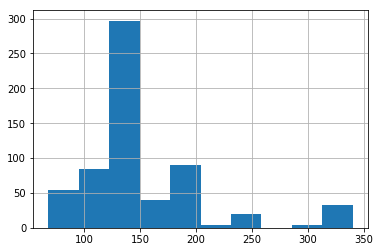

In [210]:
df.BHP.hist()

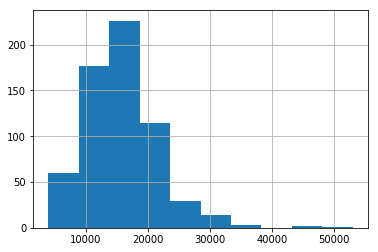

In [211]:
df.price.hist()

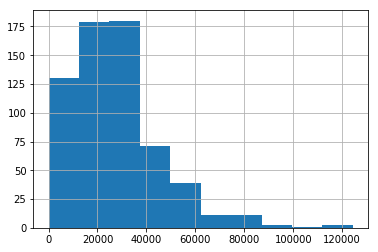

In [212]:
df.mileage.hist()

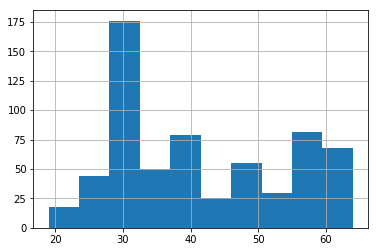

In [213]:
df.name_len.hist()

## Boxplot of some features

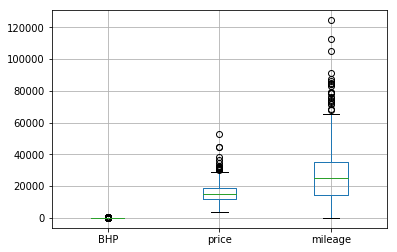

In [215]:
df.boxplot(column=["BHP", "price", "mileage"])

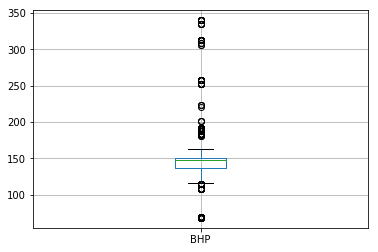

In [217]:
df.boxplot(column=["BHP"])

In [226]:
# Define numerical and categorical features
numerical_features = []
categorical_features = []

for feature, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        numerical_features.append(feature)
    else:
        categorical_features.append(feature)

numerical_features, categorical_features

(['BHP',
  'engine',
  'mileage',
  'owners',
  'price',
  'year',
  'se',
  'eco',
  'sport',
  'm_sport',
  'lux',
  'sat_nav',
  'bluetooth',
  'leather',
  'three_door',
  'name_len'],
 ['ULEZ', 'body', 'fuel', 'name', 'transmission', 'make', 'model', 'year_reg'])

In [231]:
# Check correlation on numeric features
df_num = ["BHP", "engine", "mileage", "price", "year", "name_len"] 
df[df_num].corr()

,BHP,engine,mileage,price,year,name_len
BHP,1.000000,0.792209,0.049269,0.471492,-0.016806,0.031012
engine,0.792209,1.000000,0.100450,0.446871,-0.061948,0.098410
mileage,0.049269,0.100450,1.000000,-0.455663,-0.623690,0.140290
price,0.471492,0.446871,-0.455663,1.000000,0.584107,0.147148
year,-0.016806,-0.061948,-0.623690,0.584107,1.000000,0.037129
name_len,0.031012,0.098410,0.140290,0.147148,0.037129,1.000000


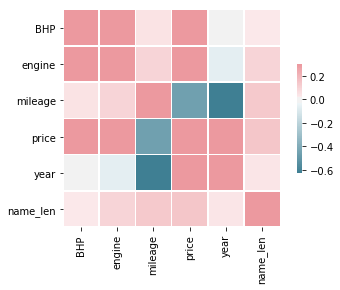

In [232]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[df_num].corr(),vmax=.3, center=0,
           cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [267]:
bool_features = ['price', 'se', 'eco', 'sport', 'm_sport', 'lux', 'sat_nav',
                 'bluetooth', 'leather', 'three_door']
df[bool_features].corr()

,price,se,eco,sport,m_sport,lux,sat_nav,bluetooth,leather,three_door
price,1.000000,0.130072,-0.133563,0.211362,0.329845,0.029378,-0.166468,-0.145143,0.013180,0.012887
se,0.130072,1.000000,-0.101017,0.449339,0.510230,-0.056581,-0.024638,-0.088939,0.111465,0.071233
eco,-0.133563,-0.101017,1.000000,-0.099669,-0.051542,-0.007889,-0.035794,-0.014941,-0.014941,-0.007196
sport,0.211362,0.449339,-0.099669,1.000000,0.517130,-0.055127,0.016424,-0.122568,0.095408,0.072196
m_sport,0.329845,0.510230,-0.051542,0.517130,1.000000,-0.063227,-0.069852,-0.080733,0.192345,0.021241
lux,0.029378,-0.056581,-0.007889,-0.055127,-0.063227,1.000000,0.000141,-0.018328,0.072730,-0.008827
sat_nav,-0.166468,-0.024638,-0.035794,0.016424,-0.069852,0.000141,1.000000,0.012185,-0.011652,-0.040052
bluetooth,-0.145143,-0.088939,-0.014941,-0.122568,-0.080733,-0.018328,0.012185,1.000000,-0.034711,-0.016717
leather,0.013180,0.111465,-0.014941,0.095408,0.192345,0.072730,-0.011652,-0.034711,1.000000,-0.016717
three_door,0.012887,0.071233,-0.007196,0.072196,0.021241,-0.008827,-0.040052,-0.016717,-0.016717,1.000000


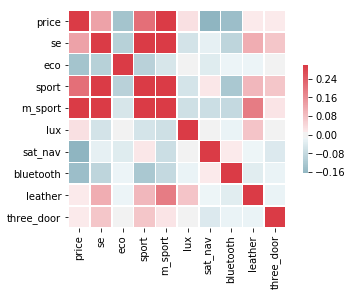

In [268]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[bool_features].corr(),vmax=.3, center=0,
           cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [263]:
# Create bar chart on categorical features
df_cat = categorical_features + bool_features

graph for ULEZ: total = 2


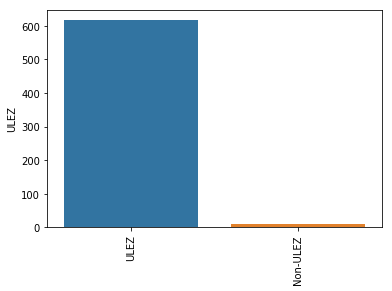

graph for body: total = 3


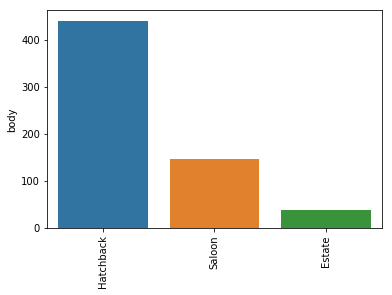

graph for fuel: total = 5


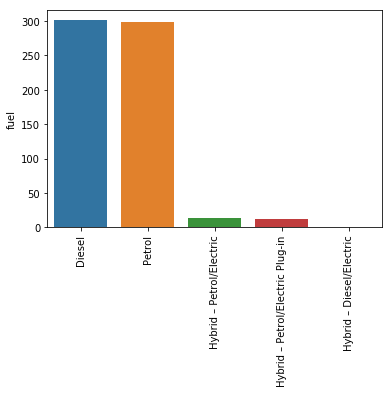

graph for name: total = 380


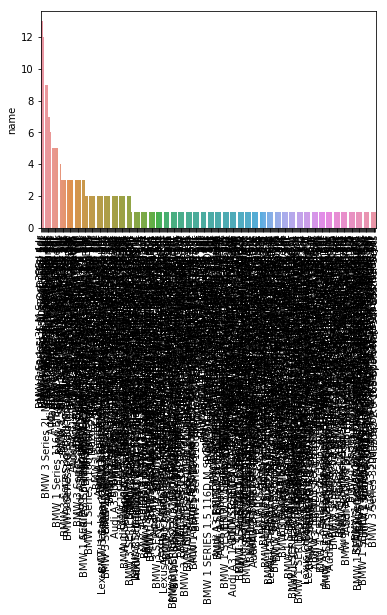

graph for transmission: total = 2


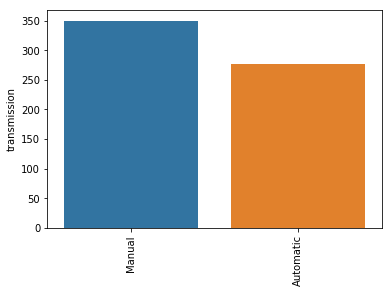

graph for make: total = 5


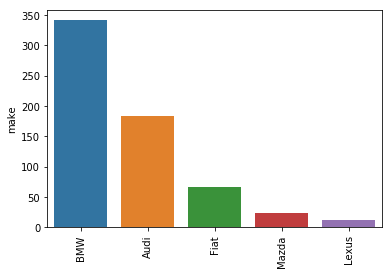

graph for model: total = 6


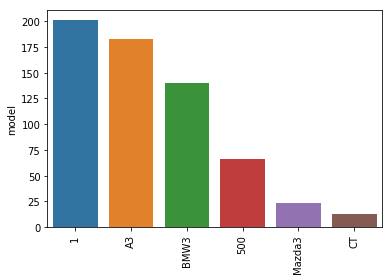

graph for year_reg: total = 13


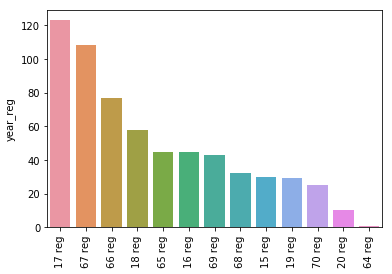

graph for se: total = 2


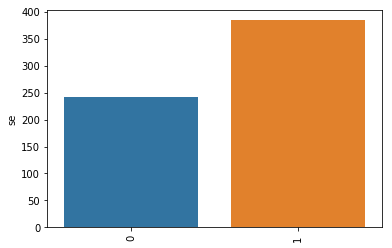

graph for eco: total = 2


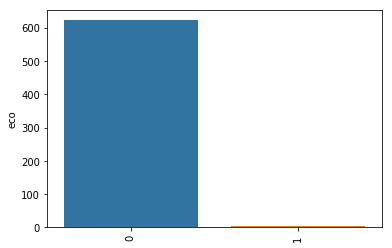

graph for sport: total = 2


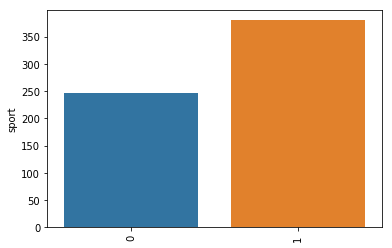

graph for m_sport: total = 2


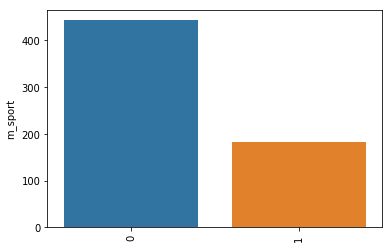

graph for lux: total = 2


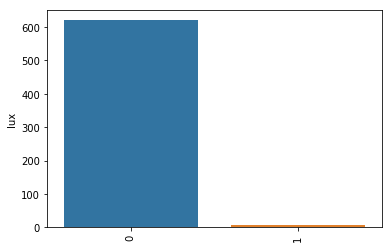

graph for sat_nav: total = 2


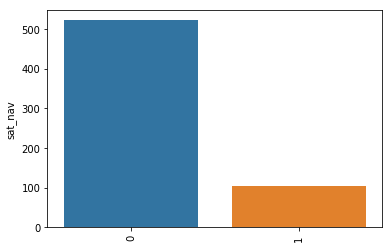

graph for bluetooth: total = 2


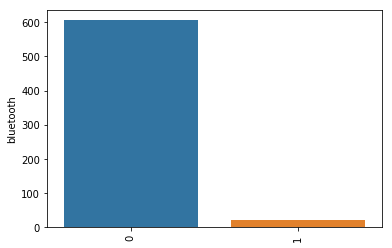

graph for leather: total = 2


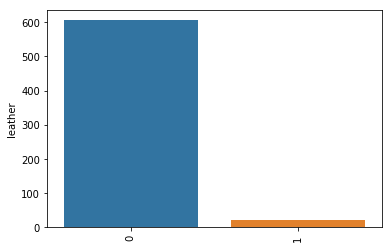

graph for three_door: total = 2


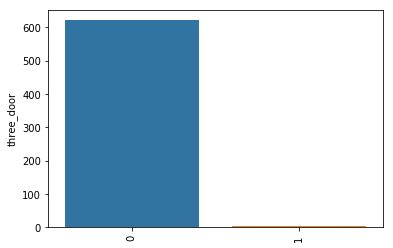

In [238]:
for feature in df_cat:
    cat_num = df[feature].value_counts()
    print("graph for %s: total = %d" % (feature, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [241]:
# pivot tables
pd.pivot_table(df, index = ["make","model"], values = "price")

price
make  model               
Audi  A3      16630.710383
BMW   1       14690.855721
      BMW3    19683.764286
Fiat  500      7725.151515
Lexus CT      18438.846154
Mazda Mazda3  16105.391304

In [245]:
pd.pivot_table(df, index = ["year_reg", "model"], values = "price", aggfunc = "count").sort_values("year_reg", ascending = False)

price
year_reg model        
70 reg   CT          4
         BMW3        6
         A3         14
         1           1
69 reg   A3          6
         1           8
         500        10
         BMW3        9
         Mazda3     10
68 reg   CT          1
         BMW3        6
         A3         11
         500         4
         1          10
67 reg   A3         29
         1          39
         500        11
         Mazda3      5
         BMW3       22
         CT          2
66 reg   CT          1
         BMW3       14
         A3         30
         500         5
         1          27
65 reg   BMW3       11
         A3          9
         500         6
         1          19
64 reg   1           1
...                ...
20 reg   A3          4
         500         1
         1           2
         BMW3        2
19 reg   CT          3
         BMW3        5
         A3          9
         500         5
         1           7
18 reg   1          10
         BMW3       20
         500         4
         A3         19
         CT          1
         Mazda3      4
17 reg   Mazda3      2
         BMW3       26
         A3         35
         500         7
         1          53
16 reg   Mazda3      1
         CT          1
         BMW3       13
         A3          6
         500         8
         1          16
15 reg   A3         11
         500         5
         BMW3        6
         1           8

[61 rows x 1 columns]

In [248]:
pd.pivot_table(df[df.make=="BMW"], index = ["year_reg"], values = "price").sort_values("price", ascending = False)

,price
year_reg,
70 reg,40250.000000
20 reg,29562.500000
69 reg,26236.764706
19 reg,23072.833333
18 reg,18172.300000
68 reg,17465.625000
67 reg,16071.622951
66 reg,15465.463415
17 reg,14852.367089


In [252]:
pd.pivot_table(df, index = ["fuel","transmission"], values = "price")

price
fuel                             transmission              
Diesel                           Automatic     18274.781690
                                 Manual        13416.037736
Hybrid – Diesel/Electric         Automatic     53000.000000
Hybrid – Petrol/Electric         Automatic     18438.846154
Hybrid – Petrol/Electric Plug-in Automatic     22268.750000
Petrol                           Automatic     19693.953704
                                 Manual        12863.623037

In [260]:
pd.pivot_table(df, index = "model", columns = ['leather'], values = "price", aggfunc = "count")

leather,0,1
model,,
1,197.0,4.0
500,66.0,NaN
A3,182.0,1.0
BMW3,126.0,14.0
CT,12.0,1.0
Mazda3,22.0,1.0
